# Import Library


In [285]:
# Import Basic Libray for handeling dataset and preprocessing and  also for visulization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library for 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# For gradient-boosted decision trees.
import xgboost as xgb
from xgboost import XGBClassifier

from  IPython.display import clear_output


import warnings
warnings.filterwarnings('ignore')


# Load Dataset

In [286]:
df = pd.read_csv('/kaggle/input/traffic-accident-prediction/dataset_traffic_accident_prediction1.csv')
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.00,100.00,5.00,0.00,NaN,Wet,Car,51.00,48.00,Artificial Light,0.00
1,Clear,Rural Road,Night,NaN,120.00,3.00,0.00,Moderate,Wet,Truck,49.00,43.00,Artificial Light,0.00
2,Rainy,Highway,Evening,1.00,60.00,4.00,0.00,Low,Icy,Car,54.00,52.00,Artificial Light,0.00
3,Clear,City Road,Afternoon,2.00,60.00,3.00,0.00,Low,Under Construction,Bus,34.00,31.00,Daylight,0.00
4,Rainy,Highway,Morning,1.00,195.00,11.00,0.00,Low,Dry,Car,62.00,55.00,Artificial Light,1.00


# Preprocessing

In [287]:
print(f'There are: {df.shape[1]} columns and : {df.shape[0]} Rows')


There are: 14 columns and : 840 Rows


In [288]:
df.shape
# See here to check Row And Columns

(840, 14)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [290]:
# To check the Naull Values
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

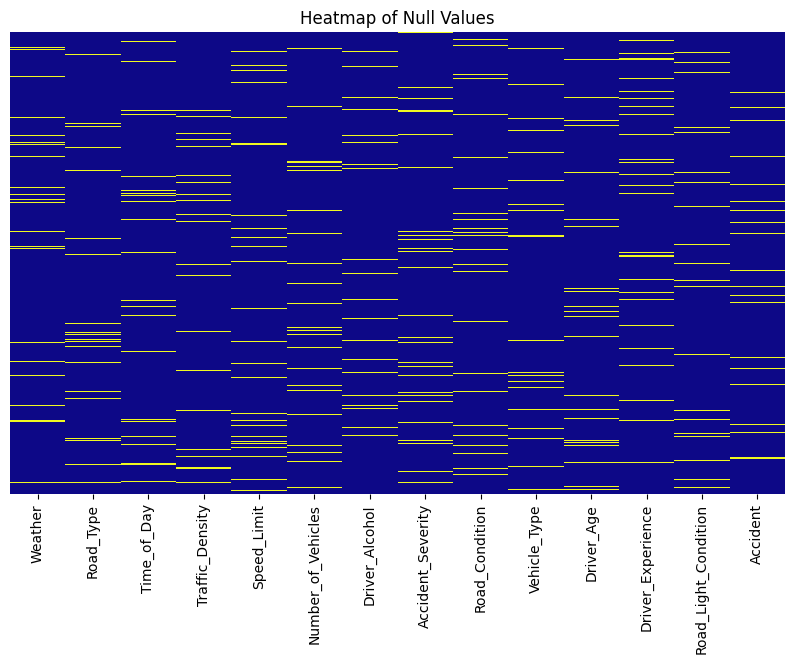

In [291]:
# Heatmap for null values
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(df.isnull(), cbar=False, cmap='plasma', yticklabels=False)
plt.title('Heatmap of Null Values')
plt.show()


# Handling Missing Values

In [292]:

# Loop through columns
for column in df.columns:
    if df[column].dtype != 'object':  # If the column is numerical (float)
        mean_value = df[column].mean()  # Calculate the mean
        df[column].fillna(mean_value, inplace=True)  # Fill missing values with mean
    else:  # If the column is categorical (object)
        mode_value = df[column].mode()[0]  # Calculate the mode
        df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Check the result
df.isnull().sum()



Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

In [293]:
# Replace 0.0 with 0 and 1.0 with 1 in 'column1' only
df['Accident'] = df['Accident'].replace({0.0: 0, 1.0: 1}).astype(int)

In [294]:
# For cheacking Duplicated values
duplicated = df.duplicated().sum()
print(duplicated)



16


In [295]:
#drop duplicate
df.drop_duplicates(inplace= True)

In [296]:
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [297]:
df.shape

(824, 14)

# Visulization

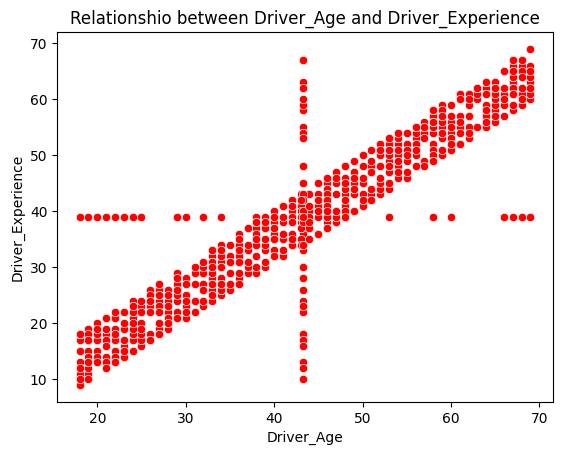

In [298]:
sns.scatterplot(df, x=('Driver_Age'), y=('Driver_Experience'), color='red')

plt.xlabel('Driver_Age')
plt.ylabel('Driver_Experience')
plt.title('Relationshio between Driver_Age and Driver_Experience')


plt.show()

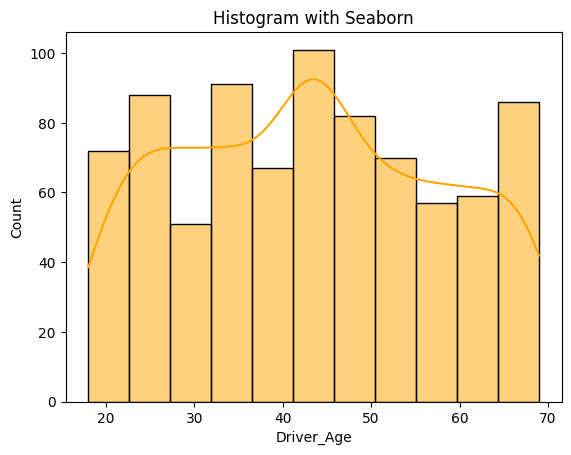

In [299]:

#  using Seaborn
sns.histplot(df['Driver_Age'], kde=True, color='orange')  # KDE adds a smooth line to visualize the density
plt.title('Histogram with Seaborn')
plt.show()

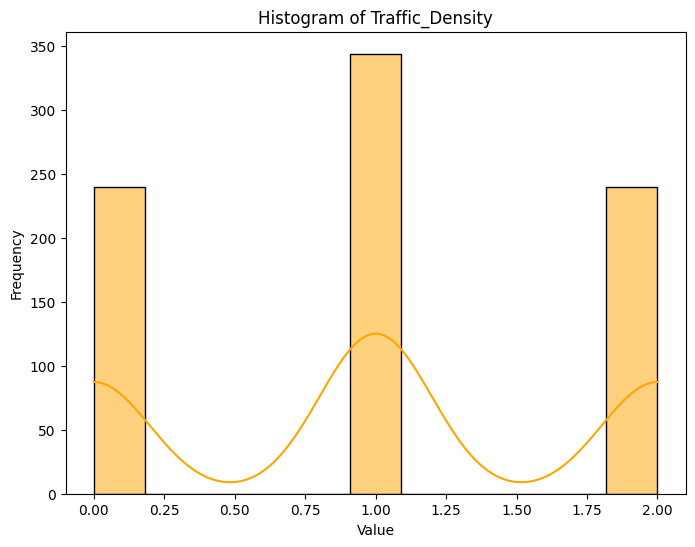

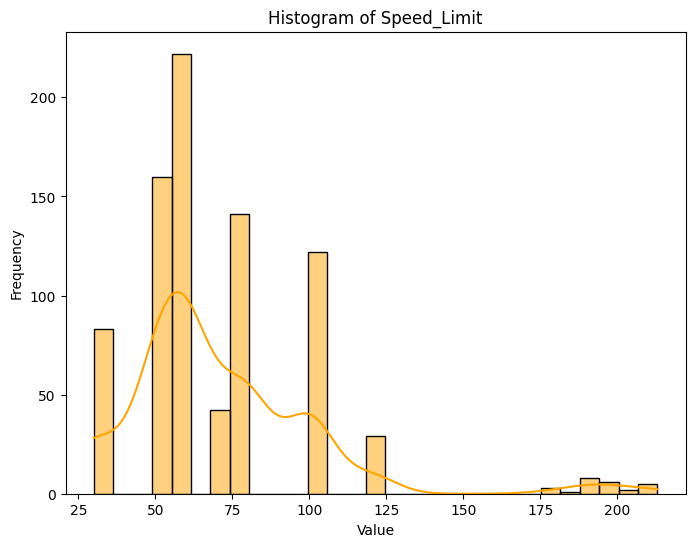

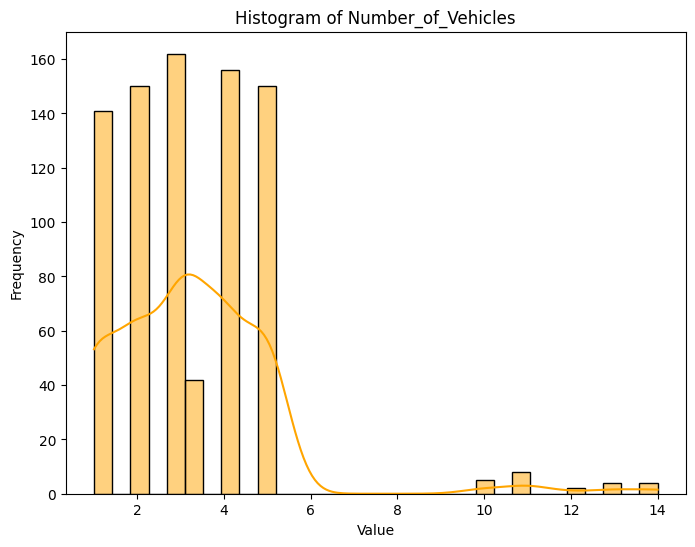

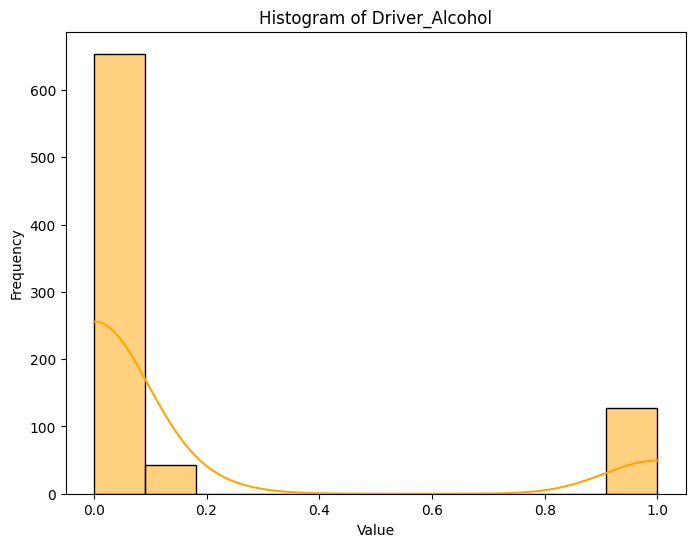

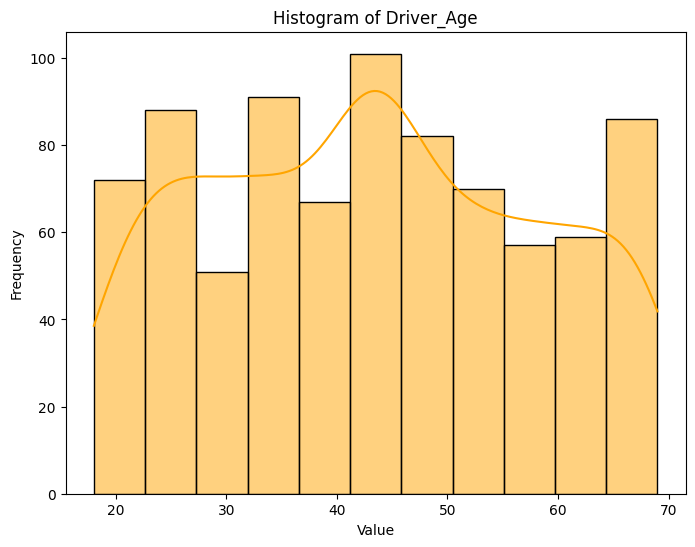

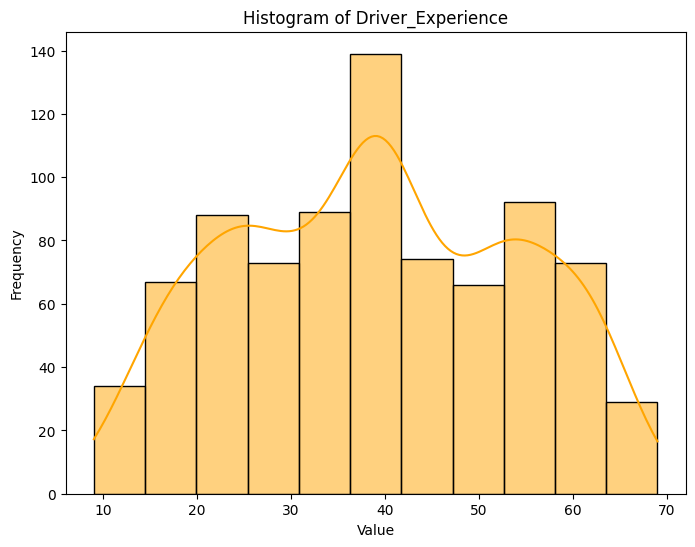

In [300]:

for column in df.select_dtypes(include='float64').columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='orange') 
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


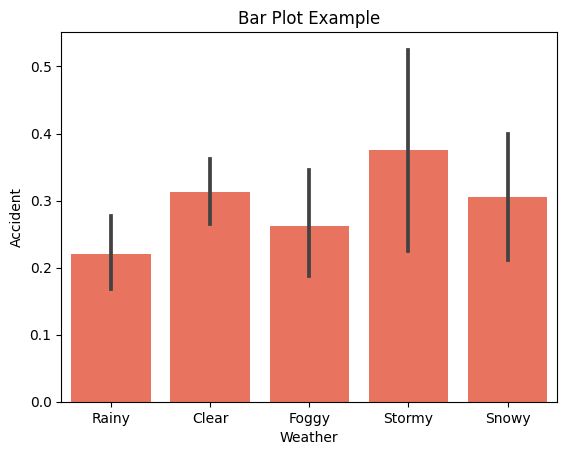

In [301]:
sns.barplot(x='Weather', y='Accident', data=df, color='#FF6347')

# Add title and labels
plt.title('Bar Plot Example')
plt.xlabel('Weather')
plt.ylabel('Accident')

# Show plot
plt.show()

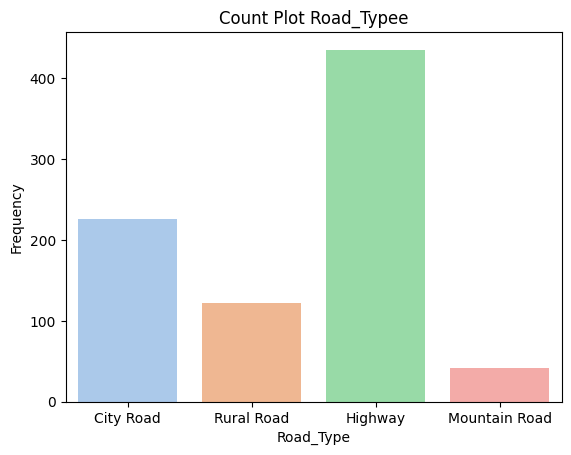

In [302]:

sns.countplot(x='Road_Type', data=df, palette='pastel')


plt.title('Count Plot Road_Typee')
plt.xlabel('Road_Type')
plt.ylabel('Frequency')

# Show plot
plt.show()


In [303]:
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

# Remove Outlier

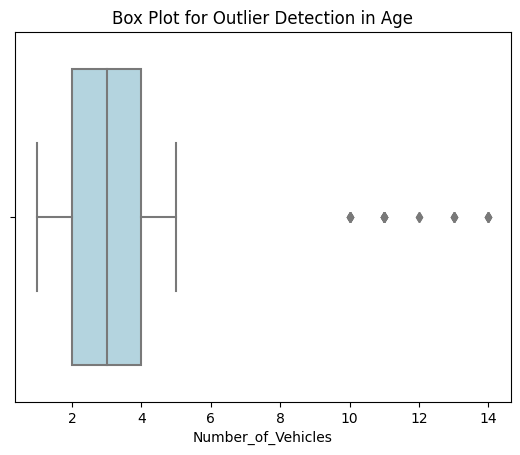

In [304]:


# Create a box plot to visualize outliers in 'Age'
sns.boxplot(x=df['Number_of_Vehicles'], color='lightblue')

# Add title and labels
plt.title('Box Plot for Outlier Detection in Age')
plt.xlabel('Number_of_Vehicles')

# Show plot
plt.show()


<Axes: xlabel='Speed_Limit'>

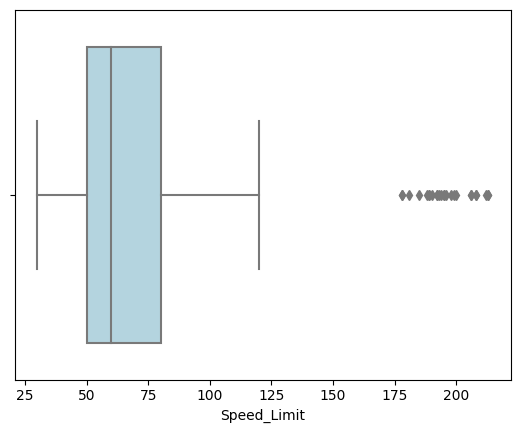

In [305]:

# Create a box plot to visualize outliers in 'Age'
sns.boxplot(x=df['Speed_Limit'], color='lightblue')



In [306]:
df = df[(df['Speed_Limit']>1)& (df['Speed_Limit']<125)]


# Machine Learning 

In [307]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert the categorical and object columns into numeric
encoder = LabelEncoder()

for i in df.select_dtypes(include='object'or 'Categorical').columns:
    df[i] = encoder.fit_transform(df[i])

In [308]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [309]:
x = df.drop(columns=['Accident'])
y = df['Accident']


scaler = StandardScaler()
x = scaler.fit_transform(x)

In [310]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=123)


In [311]:


# Example: Convert continuous target variable into binary categories (e.g., 0 or 1)
y_train = pd.cut(y_train, bins=[-float('inf'), 0, float('inf')], labels=[0, 1])

# Train the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)

y_pred = rf_clf.predict(x_test)

# Evaluate the model using Mean Squared Error
mse = accuracy_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.68


In [312]:
# pip install lazypredict


In [313]:

import lazypredict
from lazypredict.Supervised import LazyClassifier

In [314]:
clf =  LazyClassifier(
    verbose=0,
    ignore_warnings=False,
    custom_metric = None,
    classifiers='all',
    predictions=False,
    random_state=123
)



In [315]:
models, prediction = clf.fit(x_train, x_test, y_train, y_test)
clear_output()

In [316]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,0.64,0.57,0.57,0.65,0.01
QuadraticDiscriminantAnalysis,0.66,0.53,0.53,0.65,0.01
SGDClassifier,0.59,0.52,0.52,0.61,0.02
BernoulliNB,0.74,0.52,0.52,0.65,0.01
LogisticRegression,0.72,0.51,0.51,0.64,0.02
LinearDiscriminantAnalysis,0.72,0.51,0.51,0.64,0.03
Perceptron,0.57,0.50,0.50,0.59,0.01
LinearSVC,0.72,0.50,0.50,0.63,0.06
RidgeClassifier,0.72,0.50,0.50,0.63,0.02


In [317]:


# Initialize the Support Vector Classifier model
svc_model = SVC(kernel='linear', random_state=42)

# Train the model
svc_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svc_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 73.12%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       117
           1       0.00      0.00      0.00        43

    accuracy                           0.73       160
   macro avg       0.37      0.50      0.42       160
weighted avg       0.53      0.73      0.62       160



Fitting 5 folds for each of 32 candidates, totalling 160 fits


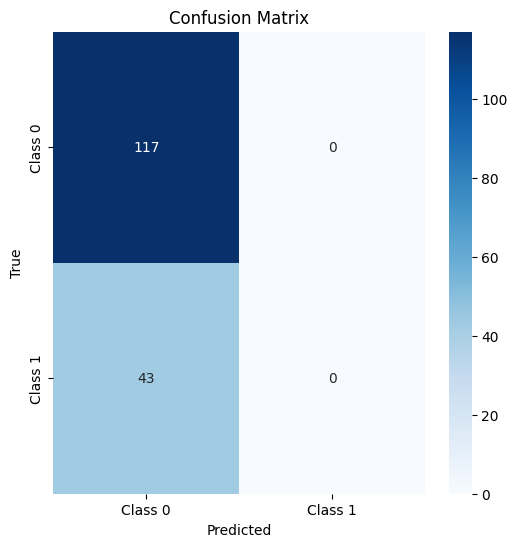

In [318]:

# Initialize the SVC model
svc = SVC(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types to try
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf' and 'poly'
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

# Train the model using the best parameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_test)

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")

# # Display detailed classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
